In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [45]:
df = pd.read_csv("cars.csv")
df

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28,16845
201,-1,95,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25,19045
202,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23,21485
203,-1,95,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27,22470


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.2+ KB


In [47]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [48]:
df['normalized-losses'].value_counts()

?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64

In [49]:
df['horsepower'].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
88      6
62      6
101     6
160     6
114     6
84      5
97      5
102     5
145     5
82      5
76      5
111     4
92      4
123     4
86      4
90      3
73      3
85      3
207     3
182     3
121     3
152     3
112     2
56      2
161     2
156     2
94      2
52      2
?       2
162     2
155     2
184     2
100     2
176     2
55      1
262     1
134     1
115     1
140     1
48      1
58      1
60      1
78      1
135     1
200     1
64      1
120     1
72      1
154     1
288     1
143     1
142     1
175     1
106     1
Name: horsepower, dtype: int64

In [50]:
df['normalized-losses'].replace("?",np.nan,inplace=True) #fill null/"?" values in normalized-losses by its mean

In [51]:
df['normalized-losses']=df['normalized-losses'].astype(float)

In [52]:
df['normalized-losses'].fillna(df['normalized-losses'].mean(),inplace=True)

In [53]:
df['horsepower']= pd.to_numeric(df['horsepower'],errors = "coerce") ##fill null/"?" values in horsepower by its mean

In [54]:
df['horsepower'].fillna(df['horsepower'].mean(),inplace=True)

In [55]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450


In [57]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

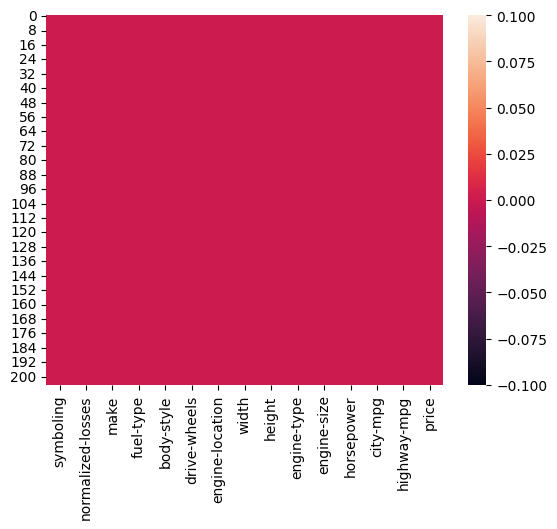

In [58]:
sns.heatmap(df.isnull())
plt.show()

In [59]:
cars_cat = df.select_dtypes(object)
cars_cat

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc
...,...,...,...,...,...,...
200,volvo,gas,sedan,rwd,front,ohc
201,volvo,gas,sedan,rwd,front,ohc
202,volvo,gas,sedan,rwd,front,ohcv
203,volvo,diesel,sedan,rwd,front,ohc


In [60]:
cars_num= df.select_dtypes(['int','float'])
cars_num

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...
200,-1,95.0,68.9,55.5,141,114.0,23,28,16845
201,-1,95.0,68.8,55.5,141,160.0,19,25,19045
202,-1,95.0,68.9,55.5,173,134.0,18,23,21485
203,-1,95.0,68.9,55.5,145,106.0,26,27,22470


In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
lbe = LabelEncoder()

In [63]:
for i in cars_cat:
    print(i)

make
fuel-type
body-style
drive-wheels
engine-location
engine-type


In [64]:
for i in cars_cat:
    df[i]=lbe.fit_transform(df[i])

In [65]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,0,1,0,2,0,64.1,48.8,0,130,111.0,21,27,13495
1,3,122.0,0,1,0,2,0,64.1,48.8,0,130,111.0,21,27,16500
2,1,122.0,0,1,2,2,0,65.5,52.4,5,152,154.0,19,26,16500
3,2,164.0,1,1,3,1,0,66.2,54.3,3,109,102.0,24,30,13950
4,2,164.0,1,1,3,0,0,66.4,54.3,3,136,115.0,18,22,17450


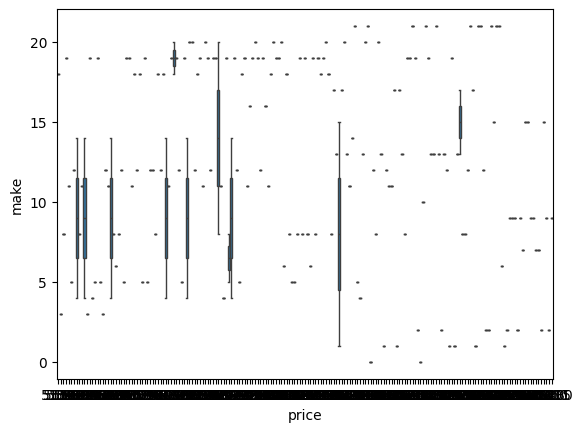

In [66]:
sns.boxplot(x=df["price"],y=df["make"])
plt.show()

In [67]:
x=df.iloc[:,:-1]
x

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,122.0,0,1,0,2,0,64.1,48.8,0,130,111.0,21,27
1,3,122.0,0,1,0,2,0,64.1,48.8,0,130,111.0,21,27
2,1,122.0,0,1,2,2,0,65.5,52.4,5,152,154.0,19,26
3,2,164.0,1,1,3,1,0,66.2,54.3,3,109,102.0,24,30
4,2,164.0,1,1,3,0,0,66.4,54.3,3,136,115.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,21,1,3,2,0,68.9,55.5,3,141,114.0,23,28
201,-1,95.0,21,1,3,2,0,68.8,55.5,3,141,160.0,19,25
202,-1,95.0,21,1,3,2,0,68.9,55.5,5,173,134.0,18,23
203,-1,95.0,21,0,3,2,0,68.9,55.5,3,145,106.0,26,27


In [68]:
y = df.iloc[:,-1]
y

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: int64

In [69]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [70]:
len(xtrain),len(ytrain),len(xtest),len(ytest)

(143, 143, 62, 62)

In [71]:
linreg= LinearRegression()

In [72]:
linreg.fit(xtrain,ytrain)

LinearRegression()

In [73]:
ypred = linreg.predict(xtest)
ypred

array([ 6147.97177535,  6877.02018581,  5163.92272988,  6529.64152282,
        9097.48416127, 26360.34172002,  7459.86435141,   877.82049881,
        5144.01614104, 13519.72327075, 15450.90944825, 14432.86068487,
       16383.3823446 , 11141.26580437, 16456.45835103, 13899.96152052,
        7470.89015168,  8822.10978266, 10871.71907185,  7575.62315193,
       10982.8020501 ,  6830.55418791, 13695.54356268,  6367.05540369,
       13729.72634597,  8822.10978266, 15020.54539526,  6519.17466513,
        4748.87641153,  9309.57917764,  8168.78349461, 14331.33093265,
       25640.12934796, 11908.15949477, 19763.97916514,  6562.05039495,
        8169.68530317, 30669.00442191,  9815.72891291, 16913.4988703 ,
        6488.35956878, 20293.75457963,  7703.43107067,  8440.48221513,
        8644.09950215,  7183.23963857, 40496.63165103,  7556.38024834,
       17202.53531151, 18961.11466889, 26165.68818112, 16952.9687522 ,
       21835.40141131,  6217.42536906, 13103.73962425,  7263.42333164,
      

In [74]:
xpred = linreg.predict(xtrain)
xpred

array([16288.85532057, 15862.94798228,  5838.84820597,  7399.92655838,
        7448.20125179,  8340.28546683, 20112.71041124, 12044.07509813,
       10881.71105318, 29477.44312379, 15852.0903972 ,  5978.96977589,
       15128.14005393, 30633.78507241,  8026.01812304, 15238.12936383,
       22671.49360937,  7399.92655838,  6877.02018581,  5438.1203349 ,
        7448.20125179, 13729.72634597, 12275.2141282 , 18782.69273114,
       34471.25494182, 19788.5808888 , 16081.4228426 ,  6001.02867037,
       10695.97411848,  9851.3318844 ,  9007.8765229 , 15773.40498834,
       18782.69273114, 15020.54539526, 17614.16449878,  8686.97523197,
        6484.50302714, 19763.97916514, 10389.52111311,  8196.25329759,
       13575.95441379,  9258.52295841, 19763.97916514,  6848.27984861,
       20937.32502594,  5364.84855963, 14826.18055193, 18110.89738615,
        7364.30814967,  7448.20125179,  8644.09950215, 18407.7389272 ,
       27393.04196215, 10345.80476622,  5854.16096662, 20831.21028795,
      

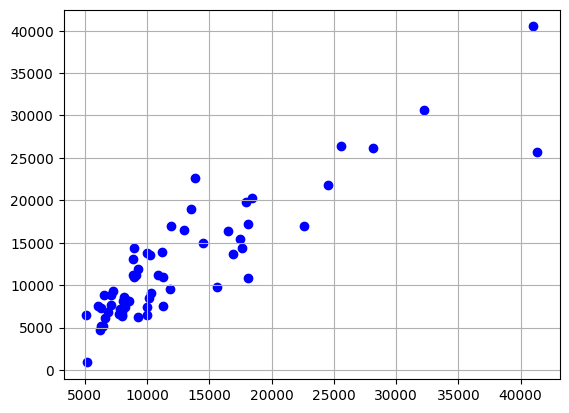

In [75]:
plt.scatter(ytest,ypred,color="blue")
plt.grid()
plt.show()

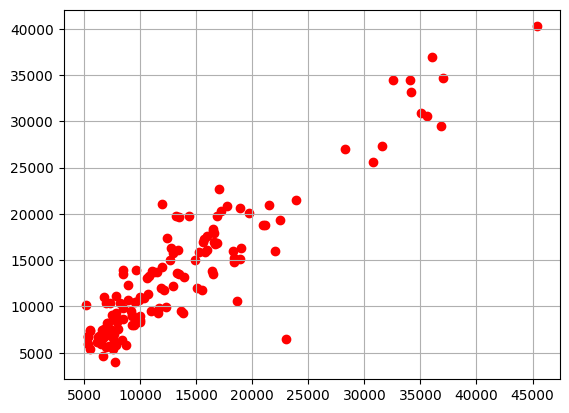

In [77]:
plt.scatter(ytrain,xpred,color="red")
plt.grid()
plt.show()

In [78]:
r2_test = r2_score(ytest,ypred)
r2_test

0.796556678039738

In [79]:
r2_train = r2_score(ytrain,xpred)
r2_train

0.8504573774895474

In [80]:
# Ridge(L2) and lasso(L1)

In [81]:
from sklearn.linear_model import Ridge, Lasso

In [82]:
rd = Ridge(alpha=10)

In [83]:
rd.fit(xtrain,ytrain)


Ridge(alpha=10)

In [85]:
ypred_rd = rd.predict(xtest)
ypred_rd

array([ 5982.73740576,  6504.34249776,  6020.26426234,  6442.89536964,
       10091.18178017, 25395.07014934,  8453.97448155,  2467.82603182,
        6027.54651164, 13045.74052934, 15634.22775083, 16441.01509474,
       16093.7969765 , 11235.67526611, 17526.73500157, 15237.44282016,
        7898.41256303,  8868.46426456, 13137.58331034,  8580.07490826,
       10736.74892591,  7109.07916573, 13481.10691728,  7103.12755736,
       14606.78695931,  8868.46426456, 16235.23723642,  7080.10034333,
        4676.86113982,  9112.6491021 ,  7442.69391571, 14937.44919631,
       27078.78113475, 11880.36429229, 18953.81590634,  7064.41549868,
        8205.04588849, 30282.3808582 , 10812.80718317, 15948.60735877,
        7625.10347783, 21137.80111407,  8327.86341524,  8069.79106149,
        9318.84217172,  7637.06661115, 41508.43322714,  8078.32800695,
       17113.1104671 , 21205.27762848, 25948.37453956, 15303.69095915,
       22045.36041033,  5757.64414345, 12845.96335364,  7646.01613076,
      

In [86]:
xpred_rd = rd.predict(xtrain)
xpred_rd

array([17244.82071279, 15742.25587075,  6412.56708704,  7442.63058889,
        7693.91044676,  8345.11336654, 22584.36249674, 13455.57973211,
       10219.99854806, 29996.08172347, 15784.42930513,  6592.48500547,
       16165.6280353 , 30295.26483773,  7554.95317059, 14875.05898786,
       21039.94082259,  7442.63058889,  6504.34249776,  4996.31828013,
        7693.91044676, 14606.78695931, 13094.21293274, 19625.04291737,
       25749.52187251, 21543.5887612 , 15754.75755137,  6803.8151379 ,
       11748.39027128,  9703.67538773,  9985.29874715, 15543.48627044,
       19625.04291737, 16235.23723642, 18185.44855505,  9303.15732708,
        6234.23643917, 18953.81590634, 10640.5591357 ,  8185.60903145,
       13463.99600322,  8444.16562234, 18953.81590634,  7464.17522408,
       21099.74668751,  5260.08502221, 15826.58861018, 19820.73235079,
        7124.04768763,  7693.91044676,  9318.84217172, 20672.74968728,
       25790.67506859,  9931.80262077,  6406.96535681, 18903.72955733,
      

In [89]:
r2_train_rd = r2_score(ytrain,xpred_rd)
r2_train_rd

0.8109538582620315

In [90]:
r2_test_rd = r2_score(ytest,ypred_rd)
r2_test_rd

0.8150222867376531

In [92]:
la= Lasso(alpha=50)

In [93]:
la.fit(xtrain,ytrain)

Lasso(alpha=50)

In [94]:
ypred_la = la.predict(xtest)
ypred_la

array([ 6185.54099558,  6919.37968004,  5431.5240483 ,  6543.04005995,
        9399.27399204, 25703.11223131,  7655.52068629,  1187.47160869,
        5410.81929039, 13525.31172076, 15522.43945771, 14807.61570537,
       16386.18555278, 11208.43221508, 16673.56067034, 14189.72960298,
        7623.30773069,  8735.87591826, 11416.428026  ,  7908.73514741,
       11090.26892656,  6910.71369713, 13624.94328209,  6571.0882222 ,
       13964.25124363,  8735.87591826, 15297.72591941,  6328.87727346,
        4867.27064924,  9235.64264658,  8041.41824696, 14571.65801319,
       26088.80086319, 12185.34621149, 19232.19526477,  6373.47213665,
        8226.46335993, 30993.91659912,  9656.92525585, 16820.50121748,
        6662.56097513, 20550.22218753,  7457.19863235,  8498.5284654 ,
        8865.99834643,  7331.67169227, 40886.50530645,  7688.01160155,
       17225.09949813, 19578.18882769, 25560.88024842, 16601.07177812,
       21849.20396926,  6279.37002831, 13101.4172615 ,  7304.2385035 ,
      

In [95]:
xpred_la = la.predict(xtrain)
xpred_la

array([16431.4513309 , 16154.33129434,  6117.10049811,  7476.86730537,
        7577.08262456,  8451.86068071, 20557.53051147, 12328.45543741,
       10793.57568104, 29625.37622636, 15854.42674614,  6090.07416004,
       15346.91522002, 30957.28510436,  7962.07352534, 14848.61473604,
       21761.2562649 ,  7476.86730537,  6919.37968004,  5543.37137491,
        7577.08262456, 13964.25124363, 12601.1742517 , 19126.97789944,
       32069.49522035, 20286.79168341, 16113.05769582,  5995.35802486,
       11045.08665761,  9916.82790132,  9237.38071863, 15861.32531509,
       19126.97789944, 15297.72591941, 17872.17644134,  8910.59320962,
        6508.3763727 , 19232.19526477, 10381.30519315,  8187.55188469,
       13697.57176005,  8673.60521403, 19232.19526477,  7083.43193459,
       21032.95320617,  5355.26466973, 15073.78736305, 18312.70568038,
        7266.81950486,  7577.08262456,  8865.99834643, 18772.21728793,
       26591.23211789, 10440.72433895,  6133.02723496, 20418.5503859 ,
      

In [96]:
r2_test_la = r2_score(ytest,ypred_la)
r2_train_la = r2_score(ytrain,xpred_la)

In [97]:
r2_test_la,r2_train_la

(0.8039357524111294, 0.8470766580894455)

In [99]:
for i in range(100,201):
    la = Lasso(alpha=i)
    la.fit(xtrain,ytrain)
    ypred = la.predict(xtest)
    train = la.score(xtrain,ytrain)
    test = la.score(xtest,ytest)
    print(f"i : {i}:- train: {train}, test: {test}")

i : 100:- train: 0.8372922869101472, test: 0.8089989519118682
i : 101:- train: 0.8370340019654074, test: 0.8090893744316341
i : 102:- train: 0.8367731493417814, test: 0.8091789601051911
i : 103:- train: 0.8365097288233738, test: 0.8092677091597651
i : 104:- train: 0.8362437397599862, test: 0.8093556220907323
i : 105:- train: 0.8359751820764016, test: 0.809442698991254
i : 106:- train: 0.8357039606128404, test: 0.8095289994157535
i : 107:- train: 0.835430264846456, test: 0.809614403740281
i : 108:- train: 0.8351539996558349, test: 0.8096989726368531
i : 109:- train: 0.8348751651768811, test: 0.8097827060334881
i : 110:- train: 0.8345936598074987, test: 0.809865662687388
i : 111:- train: 0.834309686363372, test: 0.809947724198843
i : 112:- train: 0.8340231435665735, test: 0.8100289502941955
i : 113:- train: 0.833734031384762, test: 0.8101093409999013
i : 114:- train: 0.833442241613059, test: 0.8101889541347449
i : 115:- train: 0.8331479903445225, test: 0.8102676731159631
i : 116:- train: